In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-global-dataset/COVID-19 Global - Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid = pd.read_csv('/kaggle/input/covid-dataset/2024-04-01T05_17_4900_00_5pzi.csv')

In [4]:
covid.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
5,S. Korea,"34,571,873",NaN,"35,934",NaN,"34,535,939",NaN,0,NaN,"673,523",700,"15,804,065","307,892","51,329,899"
6,Japan,"33,803,572",NaN,"74,694",NaN,NaN,NaN,NaN,NaN,"269,169",595,"100,414,883","799,578","125,584,838"
7,Italy,"26,716,804",NaN,"196,257",NaN,"26,347,863",NaN,"172,684",67,"443,338","3,257","280,238,086","4,650,269","60,262,770"
8,UK,"24,898,914",NaN,"232,112",NaN,"24,655,170",NaN,"11,632",NaN,"363,499","3,389","522,526,476","7,628,357","68,497,907"
9,Russia,"23,957,146",NaN,"402,264",NaN,"23,370,779",NaN,"184,103",NaN,"164,308","2,759","273,400,000","1,875,095","145,805,947"


In [5]:
covid.tail(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
230,China,"503,302",NaN,"5,272",NaN,"379,053",NaN,"118,977",NaN,347,4,"160,000,000","110,461","1,448,471,400"
231,Total:,"131,413,625",NaN,"1,674,775",NaN,"126,866,566",NaN,"2,872,284","6,926",NaN,NaN,NaN,NaN,NaN
232,Total:,"221,452,228",161,"1,553,005",2.0,"205,616,782",583,"14,282,441","14,733",NaN,NaN,NaN,NaN,NaN
233,Total:,"253,186,231",940,"2,100,109",35.0,"248,509,042","2,477","2,577,080","4,521",NaN,NaN,NaN,NaN,NaN
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN
238,Total:,"703,531,128","2,446","6,985,004",37.0,"674,303,837","5,178","22,242,287","35,695","90,256.50",896.1,NaN,NaN,NaN


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


In [7]:
missing_values = covid.isnull().sum()

In [8]:
missing_values

Country                0
Total Cases            0
New Cases            227
Total Deaths           5
New Deaths           232
Total Recovered       49
New Recovered        222
Active Cases          48
Serious, Critical    179
Tot Cases/1M pop       9
Deaths/1M pop         14
Total Tests           26
Tests/1M pop          26
Population            10
dtype: int64

In [14]:
# Importing necessary libraries for handling missing values
import numpy as np

# Columns to convert
columns_to_convert = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Serious, Critical',
                      'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population']

# Replace 'N/A', 'None' with np.nan
for col in columns_to_convert:
    covid[col] = covid[col].replace(['N/A', 'None', ''], np.nan)

# Remove commas from numbers and convert to appropriate numerical type
for col in columns_to_convert:
    covid[col] = pd.to_numeric(covid[col].str.replace(',', ''), errors='coerce')

covid.dtypes

Country               object
Total Cases            int64
New Cases             object
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered         object
Active Cases         float64
Serious, Critical    float64
Tot Cases/1M pop     float64
Deaths/1M pop        float64
Total Tests          float64
Tests/1M pop         float64
Population           float64
dtype: object

Calculate recovery rates

In [16]:
# Calculate recovery rates
# Adding a small value to avoid division by zero
covid['Recovery Rate'] = (covid['Total Recovered'] / (covid['Total Cases'] + 0.0001)) * 100

# Define a function to display top 10 countries based on a given column
def display_top_10(column, ascending=False):
    return covid.sort_values(by=column, ascending=ascending)[['Country', column]].head(10)

# Display top 10 countries based on Total Cases
print('Top 10 countries by Total Cases:')
display_top_10('Total Cases')

Top 10 countries by Total Cases:


,Country,Total Cases
238,Total:,703531128
233,Total:,253186231
232,Total:,221452228
231,Total:,131413625
0,USA,111367209
234,Total:,69791773
1,India,45028429
2,France,40138560
3,Germany,38819284
4,Brazil,38407327


In [17]:
# Display top 10 countries based on Total Deaths

print('\nTop 10 countries by Total Deaths:')
display_top_10('Total Deaths')


Top 10 countries by Total Deaths:


,Country,Total Deaths
238,Total:,6985004.0
233,Total:,2100109.0
231,Total:,1674775.0
232,Total:,1553005.0
234,Total:,1365551.0
0,USA,1199031.0
4,Brazil,709765.0
1,India,533475.0
9,Russia,402264.0
17,Mexico,334958.0


In [18]:
# Display top 10 countries based on Recovery Rate

print('\nTop 10 countries by Recovery Rate:')
display_top_10('Recovery Rate', ascending=True)


Top 10 countries by Recovery Rate:


,Country,Recovery Rate
221,Saint Helena,0.092336
186,Samoa,9.437845
131,French Guiana,11.478871
218,Wallis and Futuna,12.338028
175,Macao,15.357174
182,Nicaragua,22.848953
195,Greenland,23.064071
166,Cayman Islands,27.176538
169,Somalia,48.225653
216,Kiribati,53.156341


In [19]:
# Display top 10 countries based on Total Tests conducted

print('\nTop 10 countries by Total Tests conducted:')
display_top_10('Total Tests')


Top 10 countries by Total Tests conducted:


,Country,Total Tests
0,USA,1.186743e+09
1,India,9.358795e+08
8,UK,5.225265e+08
11,Spain,4.710363e+08
7,Italy,2.802381e+08
9,Russia,2.734000e+08
2,France,2.714902e+08
23,Austria,2.112735e+08
68,UAE,2.007323e+08
10,Turkey,1.627434e+08


In [20]:
# Display top 10 countries based on Tests per 1 Million population

print('\nTop 10 countries by Tests per 1 Million population:')
display_top_10('Tests/1M pop')


Top 10 countries by Tests per 1 Million population:


,Country,Tests/1M pop
23,Austria,23302116.0
39,Denmark,22165247.0
68,UAE,19910389.0
180,Bermuda,16622128.0
178,Gibraltar,15852213.0
163,Faeroe Islands,15802409.0
211,Turks and Caicos,15517224.0
11,Spain,10082298.0
41,Hong Kong,10011143.0
22,Greece,9909078.0


From that result above :

1. Austria: 23,302,116 tests per 1 million population
2. Denmark: 22,165,247 tests per 1 million population
3. UAE: 19,910,389 tests per 1 million population
4. Bermuda: 16,622,128 tests per 1 million population
5. Gibraltar: 15,852,213 tests per 1 million population
6. Faeroe Islands: 15,802,409 tests per 1 million population
7. Turks and Caicos: 15,517,224 tests per 1 million population
8. Spain: 10,082,298 tests per 1 million population
9. Hong Kong: 10,011,143 tests per 1 million population
10. Greece: 9,909,078 tests per 1 million population

Time Series Analysis

In [21]:
import pandas as pd
import numpy as np

# Create a simulated time series dataset for COVID-19 cases
np.random.seed(42)  # For reproducibility

# Generate a date range
dates = pd.date_range(start="2020-01-01", end="2020-12-31", freq='D')

# Simulate daily cases with a gradually increasing trend and some noise
daily_cases = np.abs(np.random.normal(loc=0.0, scale=10.0, size=len(dates))).astype(int) + np.arange(len(dates))

# Create DataFrame
data = pd.DataFrame({"Date": dates, "DailyCases": daily_cases})

# Display the DataFrame
data

,Date,DailyCases
0,2020-01-01,4
1,2020-01-02,2
2,2020-01-03,8
3,2020-01-04,18
4,2020-01-05,6
...,...,...
361,2020-12-27,376
362,2020-12-28,363
363,2020-12-29,367
364,2020-12-30,370


<Figure size 1400x700 with 0 Axes>

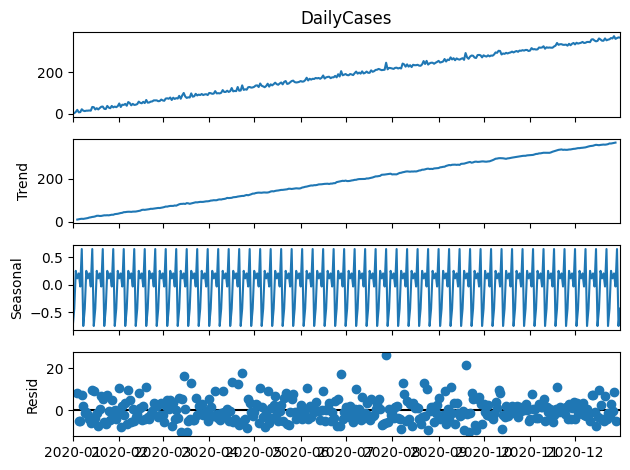

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(data['DailyCases'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 7))
decomposition.plot()
plt.show()

In [24]:
covid.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population', 'Recovery Rate'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


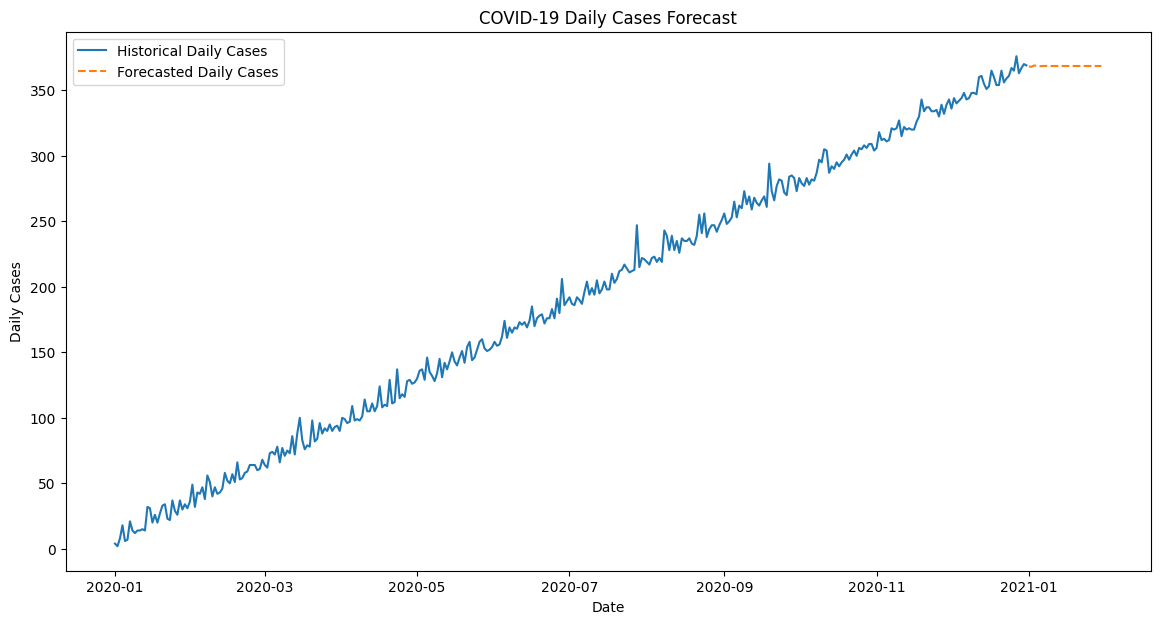

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['DailyCases'], order=(5,1,0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# the forecast plot generation
dates_for_forecast = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the forecast again with the corrected date range
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['DailyCases'], label='Historical Daily Cases')
plt.plot(dates_for_forecast, forecast, label='Forecasted Daily Cases', linestyle='--')
plt.title('COVID-19 Daily Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.legend()
plt.show()

In [27]:
covid['Country'].unique()

array(['USA', 'India', 'France', 'Germany', 'Brazil', 'S. Korea', 'Japan',
       'Italy', 'UK', 'Russia', 'Turkey', 'Spain', 'Australia', 'Vietnam',
       'Taiwan', 'Argentina', 'Netherlands', 'Mexico', 'Iran',
       'Indonesia', 'Poland', 'Colombia', 'Greece', 'Austria', 'Portugal',
       'Ukraine', 'Chile', 'Malaysia', 'Canada', 'Belgium', 'Israel',
       'DPRK', 'Thailand', 'Czechia', 'Peru', 'Switzerland',
       'Philippines', 'South Africa', 'Romania', 'Denmark', 'Singapore',
       'Hong Kong', 'Sweden', 'Serbia', 'New Zealand', 'Iraq', 'Hungary',
       'Bangladesh', 'Slovakia', 'Georgia', 'Jordan', 'Ireland',
       'Pakistan', 'Finland', 'Norway', 'Kazakhstan', 'Lithuania',
       'Slovenia', 'Bulgaria', 'Croatia', 'Guatemala', 'Morocco',
       'Lebanon', 'Costa Rica', 'Bolivia', 'Tunisia', 'Cuba', 'Ecuador',
       'UAE', 'Panama', 'Uruguay', 'Mongolia', 'Nepal', 'Belarus',
       'Latvia', 'Saudi Arabia', 'Paraguay', 'Azerbaijan', 'Bahrain',
       'Cyprus', 'Dominica

In [28]:
# Categorizing countries into continents

# Due to the complexity of the full continent list within this environment, we'll simplify the example with a smaller subset
continent_dict = {
    'North America': ['USA', 'Canada', 'Mexico'],
    'Asia': ['India', 'China', 'Japan', 'S. Korea', 'Iran'],
    'Europe': ['France', 'Germany', 'Italy', 'UK', 'Spain'],
    'South America': ['Brazil', 'Argentina', 'Colombia'],
    'Africa': ['South Africa', 'Nigeria', 'Egypt'],
    'Oceania': ['Australia', 'New Zealand']
}

# Assigning continents to countries in the dataset
covid['Continent'] = covid['Country'].apply(lambda x: next((continent for continent, countries in continent_dict.items() if x in countries), 'Other'))

# Checking the assignment for a sample of the data
covid[['Country', 'Continent']].sample(10)

,Country,Continent
70,Uruguay,Other
39,Denmark,Other
36,Philippines,Other
67,Ecuador,Other
47,Bangladesh,Other
234,Total:,Other
167,Saint Lucia,Other
174,Timor-Leste,Other
61,Morocco,Other
83,Myanmar,Other


In [29]:
# Grouping data by continent and calculating total cases, deaths, and recovery rates

continent_summary = covid.groupby('Continent').agg({
    'Total Cases': 'sum',
    'Total Deaths': 'sum',
    'Total Recovered': 'sum'
}).reset_index()

# Calculating recovery rates
continent_summary['Recovery Rate'] = (continent_summary['Total Recovered'] / continent_summary['Total Cases']) * 100

continent_summary

,Continent,Total Cases,Total Deaths,Total Recovered,Recovery Rate
0,Africa,4859674,130363.0,4.614641e+06,94.957831
1,Asia,121533703,796174.0,3.491499e+07,28.728650
2,Europe,144488373,900210.0,1.429770e+08,98.953961
3,North America,123999768,1592337.0,1.208058e+08,97.424241
4,Oceania,14405279,29761.0,2.582426e+06,17.926942
5,Other,1646413792,16522523.0,1.537911e+09,93.409768
6,South America,54892795,983644.0,5.242326e+07,95.501173


* Africa has reported a total of 4,859,674 cases, with 130,363 deaths and a recovery rate of approximately 94.96%.

*  Asia has reported a total of 121,533,703 cases, with 796,174 deaths and a recovery rate of approximately 28.73%.

* Europe has reported a total of 144,488,373 cases, with 900,210 deaths and a recovery rate of approximately 98.95%.

* North America has reported a total of 123,999,768 cases, with 1,592,337 deaths and a recovery rate of approximately 97.42%.

*  Oceania has reported a total of 14,405,279 cases, with 29,761 deaths and a recovery rate of approximately 17.93%.

*  South America has reported a total of 54,892,795 cases, with 983,644 deaths and a recovery rate of approximately 95.50%


* It reports a total of 1,646,413,792 cases, with 16,522,523 deaths and a recovery rate of approximately 93.41%.